In [107]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
mcd = pd.read_csv("menu.csv")

In [4]:
mcd.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [12]:
mcd.tail(2)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,60,20,400,17,114,38,2,9,103,21,20,0,60,6
259,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Snack),7.1 oz (202 g),410,150,16.0,25,8.0,38,0.0,30,10,200,8,57,19,1,5,51,10,10,0,30,4


In [10]:
pd.options.display.max_columns = None

In [13]:
mcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [14]:
mcd.columns.values

array(['Category', 'Item', 'Serving Size', 'Calories',
       'Calories from Fat', 'Total Fat', 'Total Fat (% Daily Value)',
       'Saturated Fat', 'Saturated Fat (% Daily Value)', 'Trans Fat',
       'Cholesterol', 'Cholesterol (% Daily Value)', 'Sodium',
       'Sodium (% Daily Value)', 'Carbohydrates',
       'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'], dtype=object)

In [18]:
mcd.count()

Category                         260
Item                             260
Serving Size                     260
Calories                         260
Calories from Fat                260
Total Fat                        260
Total Fat (% Daily Value)        260
Saturated Fat                    260
Saturated Fat (% Daily Value)    260
Trans Fat                        260
Cholesterol                      260
Cholesterol (% Daily Value)      260
Sodium                           260
Sodium (% Daily Value)           260
Carbohydrates                    260
Carbohydrates (% Daily Value)    260
Dietary Fiber                    260
Dietary Fiber (% Daily Value)    260
Sugars                           260
Protein                          260
Vitamin A (% Daily Value)        260
Vitamin C (% Daily Value)        260
Calcium (% Daily Value)          260
Iron (% Daily Value)             260
dtype: int64

In [71]:
mcd.drop(mcd.filter(regex='% Daily Value').columns, axis=1, inplace=True)

In [72]:
mcd.describe(include='all')  

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein
count,260,260,260,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
unique,9,260,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Coffee & Tea,Egg McMuffin,16 fl oz cup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,95,1,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,368.269231,127.096154,14.165385,6.007692,0.203846,54.942308,495.750000,47.346154,1.630769,29.423077,13.338462
std,NaN,NaN,NaN,240.269886,127.875914,14.205998,5.321873,0.429133,87.269257,577.026323,28.252232,1.567717,28.679797,11.426146
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,210.000000,20.000000,2.375000,1.000000,0.000000,5.000000,107.500000,30.000000,0.000000,5.750000,4.000000
50%,NaN,NaN,NaN,340.000000,100.000000,11.000000,5.000000,0.000000,35.000000,190.000000,44.000000,1.000000,17.500000,12.000000
75%,NaN,NaN,NaN,500.000000,200.000000,22.250000,10.000000,0.000000,65.000000,865.000000,60.000000,3.000000,48.000000,19.000000


array([[<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

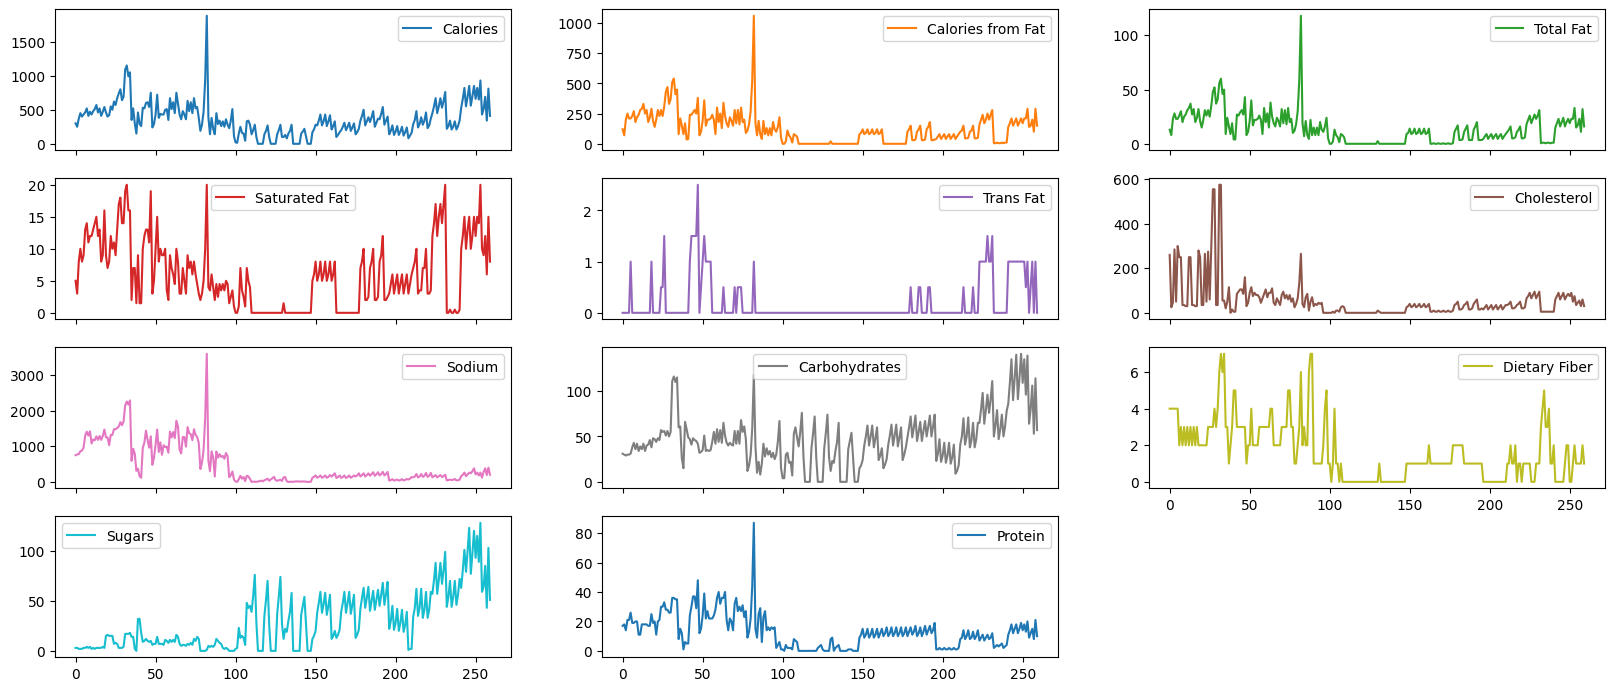

In [73]:
mcd.plot(subplots=True, layout=(7,3),figsize=(20,15))


In [74]:
#mcd.boxplot(column='Calories',by='Category',figsize=(15,10))

Calories                AxesSubplot(0.125,0.786098;0.227941x0.0939024)
Calories from Fat    AxesSubplot(0.398529,0.786098;0.227941x0.0939024)
Carbohydrates        AxesSubplot(0.672059,0.786098;0.227941x0.0939024)
Cholesterol             AxesSubplot(0.125,0.673415;0.227941x0.0939024)
Dietary Fiber        AxesSubplot(0.398529,0.673415;0.227941x0.0939024)
Protein              AxesSubplot(0.672059,0.673415;0.227941x0.0939024)
Saturated Fat           AxesSubplot(0.125,0.560732;0.227941x0.0939024)
Sodium               AxesSubplot(0.398529,0.560732;0.227941x0.0939024)
Sugars               AxesSubplot(0.672059,0.560732;0.227941x0.0939024)
Total Fat               AxesSubplot(0.125,0.448049;0.227941x0.0939024)
Trans Fat            AxesSubplot(0.398529,0.448049;0.227941x0.0939024)
dtype: object

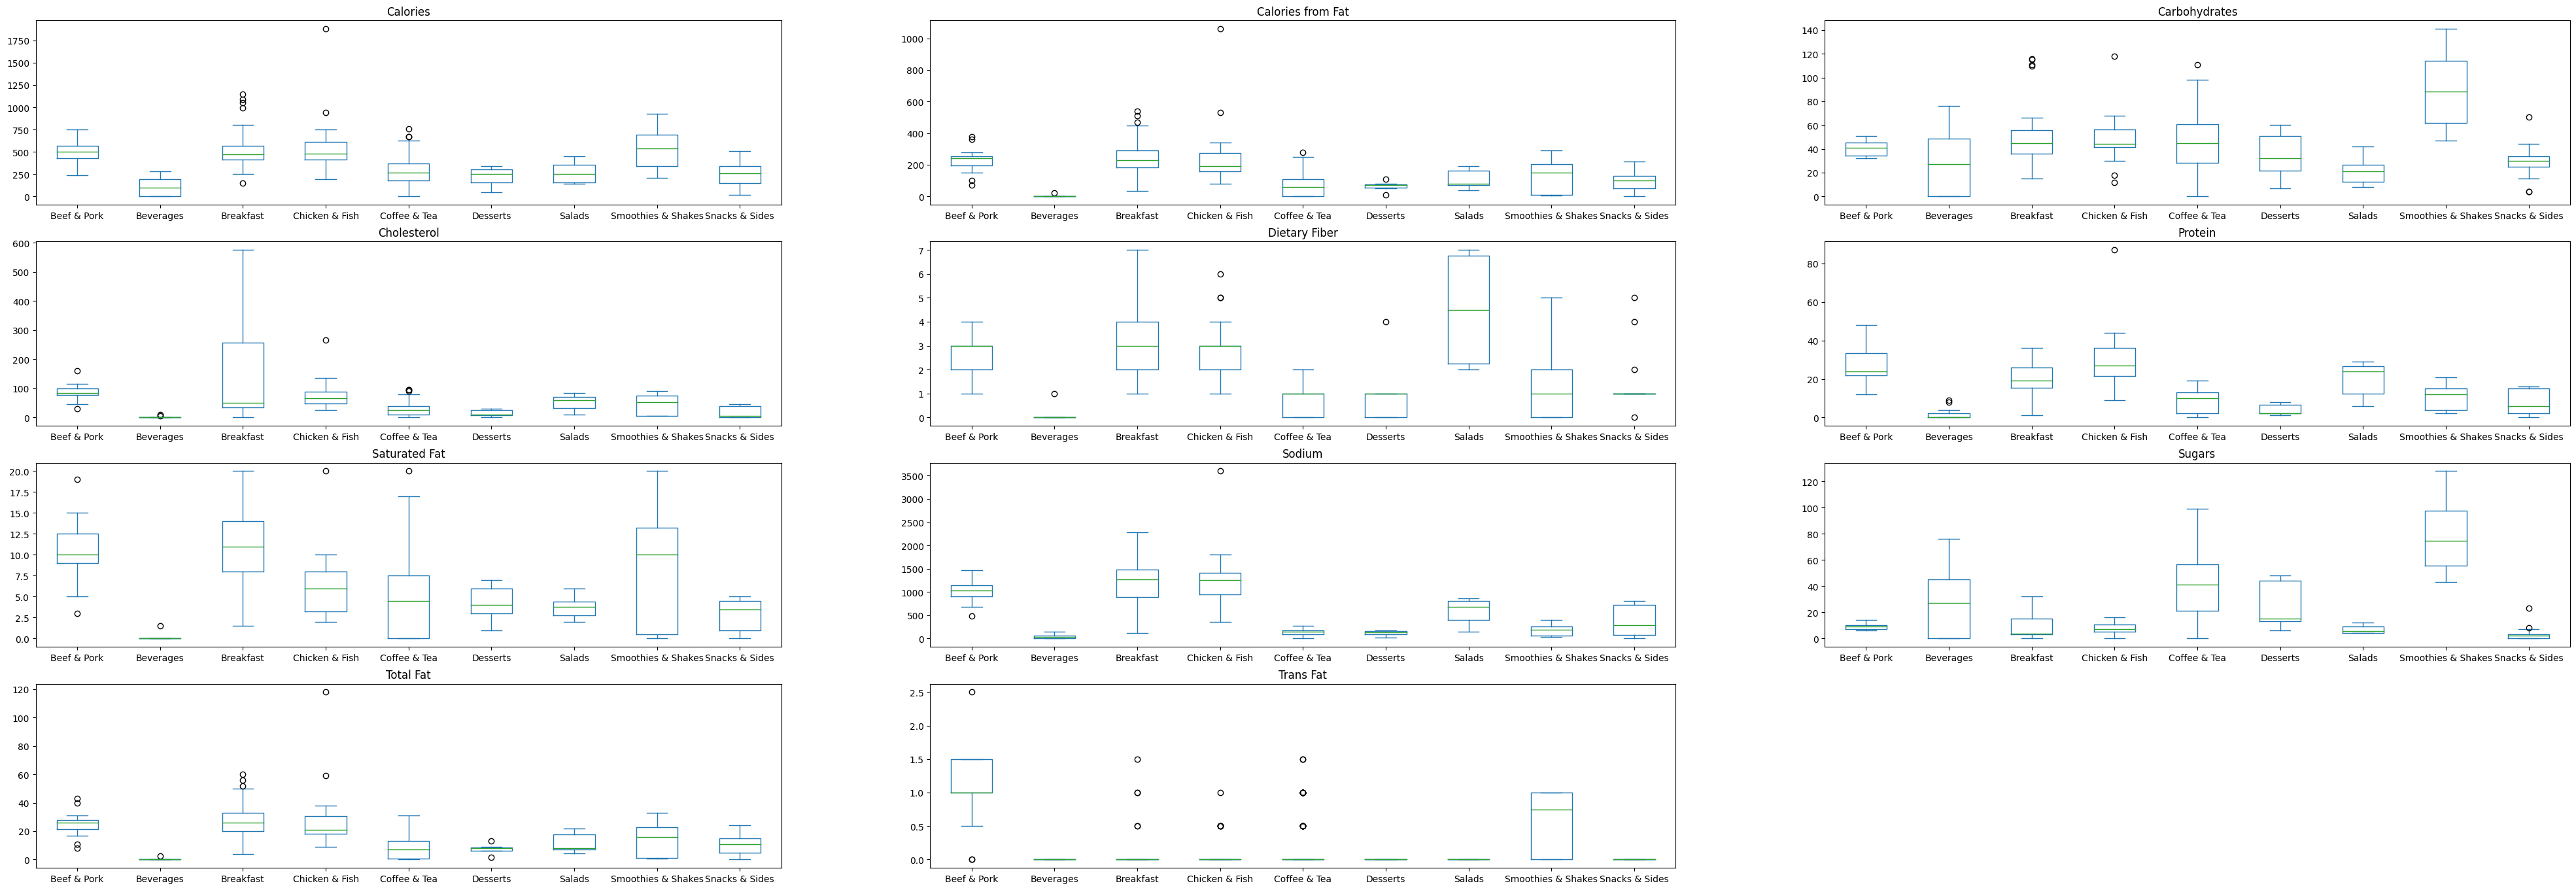

In [75]:
mcd.plot(subplots=True, layout=(7,3),figsize=(50,30),kind="box",by='Category')

In [76]:
mcd.corr().style.background_gradient(cmap='coolwarm')

C:\Users\hasha\AppData\Local\Temp\ipykernel_38716\566161160.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mcd.corr().style.background_gradient(cmap='coolwarm')


,Calories,Calories from Fat,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein
Calories,1.000000,0.904588,0.904409,0.845564,0.522441,0.596399,0.712309,0.781539,0.538894,0.259598,0.787847
Calories from Fat,0.904588,1.000000,0.999663,0.847008,0.433686,0.682161,0.846624,0.461672,0.581274,-0.115285,0.807913
Total Fat,0.904409,0.999663,1.000000,0.846707,0.431453,0.680547,0.846158,0.461213,0.580837,-0.115446,0.807773
Saturated Fat,0.845564,0.847008,0.846707,1.000000,0.620611,0.631210,0.584075,0.591261,0.351818,0.197734,0.603028
Trans Fat,0.522441,0.433686,0.431453,0.620611,1.000000,0.253935,0.187580,0.463250,0.054918,0.334756,0.388249
Cholesterol,0.596399,0.682161,0.680547,0.631210,0.253935,1.000000,0.624362,0.270977,0.435575,-0.135518,0.561561
Sodium,0.712309,0.846624,0.846158,0.584075,0.187580,0.624362,1.000000,0.200796,0.694389,-0.426536,0.869802
Carbohydrates,0.781539,0.461672,0.461213,0.591261,0.463250,0.270977,0.200796,1.000000,0.224577,0.762362,0.352122
Dietary Fiber,0.538894,0.581274,0.580837,0.351818,0.054918,0.435575,0.694389,0.224577,1.000000,-0.295178,0.641345
Sugars,0.259598,-0.115285,-0.115446,0.197734,0.334756,-0.135518,-0.426536,0.762362,-0.295178,1.000000,-0.179940


In [80]:
x = mcd.iloc[:,3:].values
x = StandardScaler().fit_transform(x)

In [81]:
x.shape

(260, 11)

In [82]:
np.mean(x),np.std(x) #normalized data has a mean of zero and a standard deviation of one i.e standard normal distribution

(-9.937660640001401e-18, 1.0)

In [101]:
pca = PCA(n_components='mle') #n_components='mle'
model = pca.fit_transform(x)

In [123]:
df = pd.DataFrame(model)

In [103]:
exp_var_pca = pca.explained_variance_ratio_

In [122]:
exp_var_pca

array([0.59378183, 0.20658724, 0.07057797, 0.0515776 , 0.03464226,
       0.02499685, 0.00897734, 0.00698387, 0.00181609])

In [104]:
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

In [118]:
cum_sum_eigenvalues # 3 components explain 87% of data

array([0.59378183, 0.80036907, 0.87094705, 0.92252465, 0.95716691,
       0.98216376, 0.99114109, 0.99812496, 0.99994105])

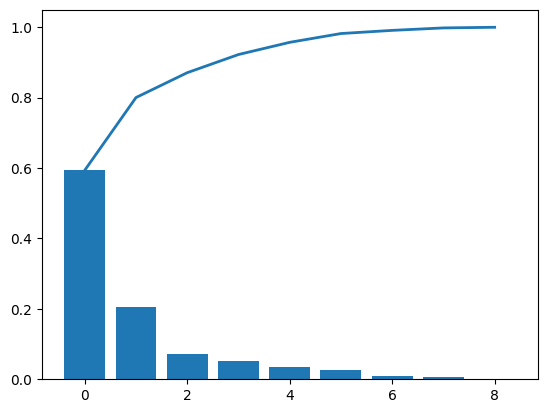

In [121]:
plt.bar(range(len(exp_var_pca)), exp_var_pca)
plt.plot(range(len(cum_sum_eigenvalues)), cum_sum_eigenvalues, linewidth=2.0)

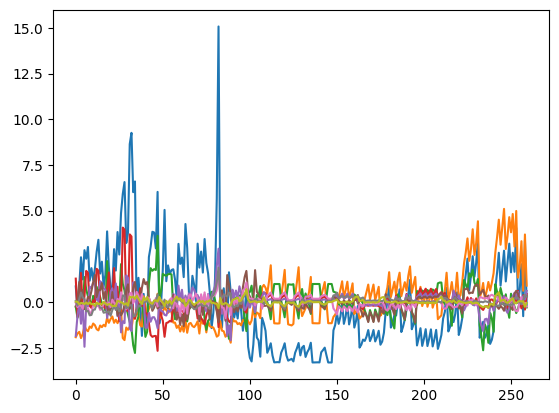

In [132]:
plt.plot(model)